# SIXT33N Project
## Phase 2: System Identification

### EE 16B: Designing Information Devices and Systems II, Spring 2020
-----

**Name 1**:

**Login**: ee16b-


**Name 2**:

**Login**: ee16b-



## <span style="color:navy">Table Of Contents</span>
-----

* ### [Note](https://drive.google.com/open?id=1W_7VX6vONH7U5hmAqc2eQ2CG-xcNBM2j)
* [Introduction](#intro)
* [Part 1: Installing the Encoders](#part1)
* [Part 2: Sensor Verification](#part2)
* [Part 3: Open Loop Data Collection and Parameter Estimation](#part3)
* [Part 4: Determining the Operating Point](#part4)

<a id='intro'></a>
## <span style="color:navy">Introduction</span>
-----

Please make sure to read the note before you begin the lab. 
**Remember to document all design choices you made and explain them in the project report.**

<a id='part1'></a>
## <span style="color:navy">Part 1: Installing the Encoders</span>
-----

### Materials: 
- 2 encoders (aka photointerrupter modules, shown below)
- 2 plastic encoder wheels (plastic wheel with lots of rectangular holes)
- Launchpad
- 8 jumper wires

### Tasks: 

**1. Put the photointerrupter modules in their slots as shown below.**
<br/><br/>
<center>
<img width="400px" src="images/proj-car-encoder1.jpg">
</center>

**2. Connect the encoders to the Launchpad as follows: **
* Use 4 jumper wires per encoder. You should **twist or braid all three wires from the encoder to the breadboard together** - this will help shield the signal wire from external noise sources.
* Connect the 'G' (ground) pins to ground on your breadboard.
* Connect the 'V' (voltage) pins to the 3.3V rail of your breadboard.
* Connect the left 'S' pin to Launchpad `P6.1` and the right 'S' pin to `P6.2`.

<a id='part2'></a>

## <span style="color:navy">Part 2: Sensor Verification</span>
-----


### <span style="color:navy">Encoder Verification</span>


### Materials:
- Launchpad and cable
- Car with encoders installed

### Tasks: 

### Materials
- Launchpad + USB cable

In general, there are two major types of error in sensing the car's trajectory. The first is noise in the sensor signals. The second is from mechanical differences between the two sides of the car.

In this section we will test for and fix the first type of noise. The mechanical type primarily affects performance over long distances, so we can compensate for it after implementing closed-loop control.

### Tasks: 
1. **Remove the 5V jumper in the isolation jumper block, and make sure your Launchpad is NOT connected to the 3.3V rail in your circuit.** This is to prevent power surges through the board while it's connected to your computer via USB. The USB provides power, and since no two power supplies are ever exactly the same voltage, if the supplies are not isolated within the Launchpad, current can surge through the board and burn the Launchpad.  

<img width="400px" src="images/jumper.jpg">


2. Connect the LaunchPad's 5V pin to the 5V row of your breadboard and that one of the ground pins is connected to your breadboard ground.
3. **Connect the left motor's BJT to `P2.0` and the right motor's BJT to `P1.5`.**
4. Connect the USB.
5. Snap the battery leads onto your 9V batteries, and knot your battery leads as shown in the image below.
    - This will drastically decrease the chance that the leads will accidentally short and kill your battery.

<img width="200px" src="images/proj-batt-lead.jpg">

6. Connect one of your 9V batteries to the input of the voltage regulators, and one to the motor switch. Make sure the ground leads of both batteries are connected to the ground rail of your circuit.

5. **If your encoders are powered properly, the LED's on them should blink when you pass something through the encoders.**
- Remove the encoder wheels if they are on the car, and upload **`encoder_test_0_ticks.ino`** to the Launchpad.
- Open the serial monitor.
- **Set the baud rate to `38400`**.
- **Press reset.**
- Follow the instructions on the serial monitor.
    - **Your car wheels are going to move.** Make sure that the car is suspended above the desk.
    - Switch 1, P2.1 is the bottom left button of the LaunchPad.
    - If your encoders are functioning properly, the serial monitor should print "Success" after each phase, and display all 0's (or at least no more than a few ticks) for the ticks per phase. Note that if your car is mis-wired, this could be a false negative.
11. Attach the encoder disk as shown below.
    - If your encoder wheels have brown paper stickers on them, remove the stickers before . 
    - If some of the holes in the encoder were not fully cut out, use the flat end of the screwdriver (it's reversible!) to push the material out.
12. Re-run the tests. If your car is connected correctly, **the tests should show several hundred encoder ticks**, ruling out a false negative.

<img width="400px" src="images/proj-car-encoder2.jpg">




<a id='part3'></a>
## <span style="color:navy">Part 3: Open Loop Data Collection and Parameter Estimation</span>
-----

Now, you will collect the data by uploading the sketch **`dynamics_data.ino`**. Glance through the sketch - it records the position of each wheel while varying the input signal $u[k]$ linearly from HIGH_PWM to LOW_PWM and back up. The sampling period is $T_s = 500\mathrm{ms}$. A long sampling period is used to minimize error due to quantization, the rounding error from measuring only integer encoder ticks.


### Interfacing with your Launchpad:

1. **Make sure the 5V isolation jumper is off whenever you have the Launchpad connected to your computer via USB.** 

2. Connect your Launchpad to your computer. When you do this, you should see two new ports pop up in Tools > Ports. One of these allows you to write, but not read and the other one allows you to do both. If you are unable to read data during the read phase, try pressing `RST` on your Launchpad. If this doesn't work, switch to the other port, reupload, and reopen the serial monitor.  After pressing `RST`, the data should show up in the serial monitor. 

3. **When you are running the car disconnected from your computer, put the 5V isolation jumper back on.** This allows the whole board to recaive power from your 5V regulator. 

### Collecting your data: 

1. **Make sure the 5V isolation jumper is off.** Connect your Launchpad to your computer.

2. Open `dynamics_data.ino` in Energia. Select the appropriate port in Tools > Ports. Make sure `WRITE == 1` in the Launchpad code, and upload `dynamics_data.ino` to your Launchpad.

3. **Make sure that you are using the first set of 5 parameters in code block `SID1`** . These parameters will sweep through the whole range of PWM values, from maximum to minimum and back to maximum, while collecting only 1 sample per PWM. **Disconnect the Launchpad from the computer and reconnect the 5V isolation jumper.** Make sure your motors and Launchpad are powered. Find a large open space to collect your data. 
    - **Note:**  Upon being uploaded to the MSP, **`dynamics_data.ino`.** does either one of two things, depending on whether the **`WRITE`.** variable located at the top of the code is **`1`.** or **`0`.**. 
       - If **`WRITE == 1`.** - The car upon having the leftmost bottom button pressed will run and collect data, then write it into permanent memory, which will survive between resets and power supply removal. The collected data will be overwritten if data collection is run again.
       - If **`WRITE == 0`.** - The car upon having its leftmost bottom button pressed will read data collected from its last run onto the Serial Monitor.
 
3. Place the car down with the caster wheel facing you. The caster wheel should be at the back of the car: you want the car to drive away from you. 

4. Press `RST`, then press and hold the button labeled `P2.1` (it's on the bottom of the Launchpad toward the left-hand side, if you're holding the Launchpad with the USB port pointing up) until the LEDs on the bottom flash. Get out of the way — your car should start running now! **Don't let your car run into anything: if it looks like it's about to hit something, quickly pick it up, turn it, and put it back down.** Try to minimize any disturbance to the motors so your data remains valid.

5. When the car stops, bring it back to your computer. **Disconnect the 5V isolation jumper** and connect the Launchpad into your computer. Check which port you're on now, as it may have changed from before, and update your selection in Tools>Ports. 

6. Set the `WRITE` variable in the Launchpad code to 0. 

7. Upload the code to your Launchpad, and open the Serial Monitor (Tools > Serial Monitor). After a few moments, your data shoud pop up in the serial monitor. If it doesn't, try pressing reset. If it still doesn't, change your port to the other port that shows up only after the Launchpad is connected, then reupload the code. Now the data should pop up. 

8. Copy the numerical data (ignore the headers) into a blank file. Save this file as `data_coarse.txt`. 


### Plotting your data: 
 
If you are using hardware for this lab, use your `data_coarse.txt`.  If you are not using hardware for this lab, use `"data_coarse_gsi.txt"`.  Replace `"data_coarse_fake.txt"` below with your filename. 
The example plot below shows an example of minimal differences between the two wheels. 

<img width="400px" src="images/data.png">

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

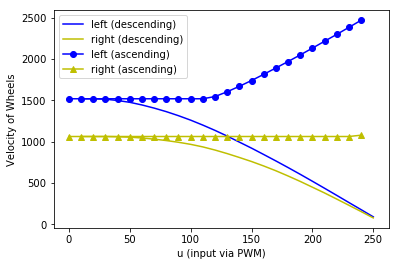

In [12]:
with open('data_coarse_fake.txt', 'r') as file:
    data = np.array([[int(num) for num in line.strip().split(',')] for line in file.readlines()])

# compute velocity from distances
vleft  = data[:, 1]
vright = data[:, 2]


u = data[:, 0].reshape((-1, 1)) # duty cycle
left_des, left_asc = np.array_split(vleft, 2)

right_des, right_asc = np.array_split(vright, 2)

u_des, u_asc = np.array_split(u, 2)

plt.plot(u_des, left_des, 'b-',  u_des, right_des, 'y-')
plt.plot(u_asc, left_asc, 'b-o',  u_asc, right_asc, 'y-^')
plt.xlabel("u (input via PWM)")
plt.ylabel("Velocity of Wheels")
labels = ("left (descending)", "right (descending)",
          "left (ascending)" , "right (ascending)")
plt.legend(labels, loc=0)
plt.show()

Now we'll collect data appropriate for least-squares to find a linear approximation for the behavior of your motors. In normal operation, the car only has to run within a small range of velocities, so we collect more samples at each PWM, over a smaller PWM range. 

### 5.2. Tasks:
1. **Comment out the first set of 5 parameters and uncomment the second set in code block `SID1`.**
2. **Set *LOW_PWM* and *HIGH_PWM*** so that the chosen PWM range is (more or less) linear on your coarse plot from the previous step.
3. If your car makes *very* tight circles (ie: radius less than 1 ft), talk to your GSI!
4. **Copy the numerical data between two "Start" lines to a text file called `data_fine.txt`**, like you did for `data_coarse`.
5. If you are using hardware, use your `data_fine.txt`.  If you are not using hardware for this lab, use `"data_fine_gsi.txt"`.  Replace `"data_fine_fake.txt"` below with your filename. 
6. Perform least-squares regression on your data as outlined in the sections below entitled **Least-Squares Regression** and **Evaluate Your Fit**.

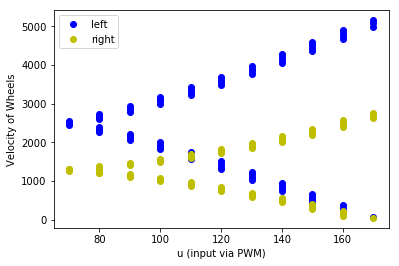

In [11]:
with open('data_fine_fake.txt', 'r') as file:
    data = np.array([[int(num) for num in line.strip().split(',')] for line in file.readlines()])
    
# compute velocity from distances
vleft  = data[:, 1]
vright = data[:, 2]

u = data[:, 0].reshape((-1, 1)) # duty cycle

plt.plot(u, vleft, 'bo',  u, vright, 'yo')
plt.xlabel("u (input via PWM)")
plt.ylabel("Velocity of Wheels")
plt.legend(("left", "right"), loc=0)
plt.show()

### 5.2.1. Least-Squares Regression
Now that we have some data, we can try performing least-squares regression.


1. Write a function that takes the data as parameters, performs least squares, and extracts the parameters. The function `np.linalg.lstsq` will be helpful here.
2. Call the function once for each wheel.
3. Record the values of $\theta$ and $\beta$ for each wheel.

In [4]:
# YOUR CODE HERE
# Write a function that formulates and performs least squares
# and returns theta and beta for one wheel
def identify_parameters(u, v):
    # Returns (theta, beta) for given (u, v)
    return pass

# extract parameters, call your function here
theta_left, beta_left = identify_parameters(u, vleft) # 0, 0
theta_right, beta_right = identify_parameters(u, vright) # 0, 0

print("float theta_left = {:.4g};".format(theta_left))
print("float theta_right = {:.4g};".format(theta_right))
print("float beta_left = {:.4g};".format(beta_left))
print("float beta_right = {:.4g};".format(beta_right))

SyntaxError: invalid syntax (<ipython-input-4-6e6276a8cfb8>, line 6)

In [5]:
# plot results of least squares fit 
u = u.reshape(-1)
vleft_LS = theta_left*u-beta_left
vright_LS = theta_right*u-beta_right
plt.plot(u, vleft, 'bo',  u, vright, 'yo', u, vleft_LS, 'b-', u, vright_LS, 'y-')
plt.xlabel("u (input via PWM)")
plt.ylabel("Velocity of Wheels")
plt.legend(("left", "right"), loc=0)

NameError: name 'theta_left' is not defined

### 5.2.2. Evaluate Your Fit

1. **Inspect the linearity of this plot and the coarse data plot.**
2. **If you think a different range of PWM may be more linear, change HIGH_PWM and LOW_PWM in the .ino file.**
    - Be careful so your car does not run too close to the minimum or maximum PWM (0 and 255).
    - If our control scheme saturates (e.g. maxes at 255) an input, the car is much harder to control.
3. Run the simulation below.

To test that we have estimated the parameters accurately, we will simulate the model using the parameters we have found. When we compare the simulated data with the collected data, we expect them to match up pretty well. 

In [ ]:
def get_distances_from_velocities(v):
    d = np.zeros(len(u) + 1)
    d[0] = 0
    for t in range(len(u)):
        d[t+1] = d[t] + v[t] 
    return d

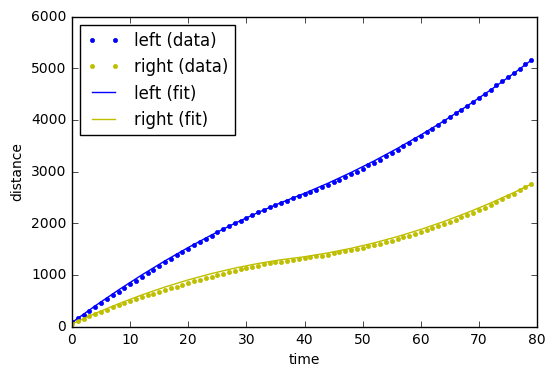

In [6]:
# model for simulation 
def sim(d0, u, theta, beta):
    d = np.zeros(len(u)+1)
    d[0] = d0
    for t in range(len(u)):
        d[t+1] = d[t] + theta*u[t] - beta
    return d
        
# plot simulated trajectories 
dleft_simulated  = sim(dleft[0], u, theta_left, beta_left)
dright_simulated = sim(dright[0], u, theta_right, beta_right)
plt.plot(dleft, 'b.', 
         dright, 'y.',
         dleft_simulated, 'b-', 
         dright_simulated, 'y-',
        )
plt.xlabel("time")
plt.ylabel("distance")
plt.legend(("left (data)", "right (data)", "left (fit)", "right (fit)"), loc='upper left')

<a id='part5'></a>
## <span style="color:navy">Part 5: Determining the Operating Point</span>
-----

**Make sure you read the linear least squares section of the note before beginning this section!**

In general, each wheel may have a different range of velocities, illustrated here.


<img src="./images/partial_overlap_lsq.png">


In order for the car to drive straight, the wheels must be moving at the same velocity. However, the motors (and hence the wheels) have different achievable velocity ranges, so we need to set the operating point to a velocity achievable by both wheels. A good choice of target velocity is the midpoint of the overlapping range of velocity. The below cell will calculate this.

Velocity range = [-1.7, 36.9]

Operating point:
float v_star = 17.6;


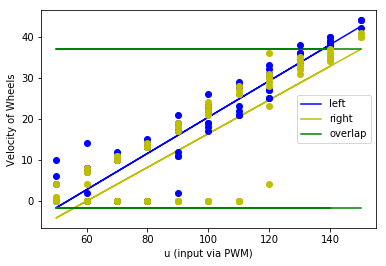

In [28]:
min_vel = max(min(vleft_LS), min(vright_LS))
max_vel = min(max(vleft_LS), max(vright_LS))
print('Velocity range = [{:0.1f}, {:0.1f}]'.format(min_vel, max_vel))
midpoint = (min_vel+max_vel)/2
print('\nOperating point:\nfloat v_star = {:.1f};'.format(midpoint))

u = u.reshape(-1)
vleft_LS = theta_left*u-beta_left
vright_LS = theta_right*u-beta_right
plt.plot(u, vleft_LS, 'b-', u, vright_LS, 'y-')
for i in (min_vel, max_vel):
    plt.plot(u, 0*u + i, 'g-')
plt.plot(u, vleft, 'bo',  u, vright, 'yo')
plt.xlabel("u (input via PWM)")
plt.ylabel("Velocity of Wheels")
plt.legend(("left", "right", "overlap"), loc=0)

## <span style="color:#ba190f">CHECKOFF</span>
-----
- **Show your GSI your data collection and parameters.** Your GSI will double check your parameters.
 
- **Show your GSI that you have submitted the lab assignment on Gradescope and have credit for all the labs you've completed.**
 
 ## <span style="color:red">SAVE ALL YOUR DATA!!</span>